# Feature Selection

How to select features for a machine learning dataset. Feature selection can improve model performance dramatically in some situations, and almost always speeds up training.

## 1) Regression

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load dataset
housing = fetch_california_housing()

# Convert to DataFrames for easier manipulation
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['MEDV'] = housing.target

print(df_housing.shape)

(20640, 9)


### 1.A) Filter Methods

**Q: What statistics could you apply to the features for purposes of selection?** <br>
Pearson's correlation for numerical input and numerical output, and linear data.
Spearman's correlation is used for nonlinear data.

#### Pearson's R Correlation

\begin{equation}
R = \frac{n \sum xy - (\sum x)(\sum y)}{\sqrt{[n \sum x^2 - (\sum x)^2][n \sum y^2 - (\sum y)^2]}}
\end{equation}

$R = 1$: Perfect Positive <br>
$R > 0.5$: Strong Positive <br>
$.3 < R \leq .5$: Moderate Positive <br>
$0 < R \leq .3$: Weak Positive <br>
$R = 0$: None <br>
$0 > R \geq –.3$: Weak Negative <br>
$–.3 < R \geq –.5$: Moderate Negative <br>
$R < –.5$: Strong Negative <br>
$R = -1$: Perfect Negative <br>


In [2]:
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MEDV        0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude      MEDV  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

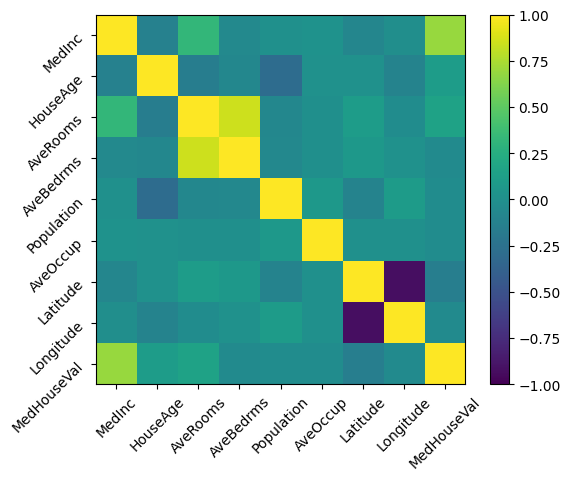

In [3]:
# Use Pearson's R to find correlations with the target variable
print(df_housing.corr())

plt.imshow(df_housing.corr())

features = housing.feature_names + housing.target_names
plt.xticks(range(len(features)),labels = features, rotation=45);
plt.yticks(range(len(features)),labels = features, rotation=45);
plt.colorbar()
plt.clim(-1,1)

**Q: From a quick glance, which features seem correlated with median house value?** <br>
MedInc, HouseAge, and AveRooms, Latitude

**Q: Are there any features that could be removed?** <br>
All the other features

**Q: Is there a situation where you would remove a feature, despite it having a good correlation with your target of interest?** <br>
Yes, when feature A and B both have high correlation with output, but feature A and B have high correlation with each other. For example, AveRooms and AveBedrms are highly correlated, and if AveBedrms is also highly correlated with output, we might not want to include both (but since AveBedrms are not so correlated with the output, we didn't include it from the start).

(16512, 4)
(4128, 4)


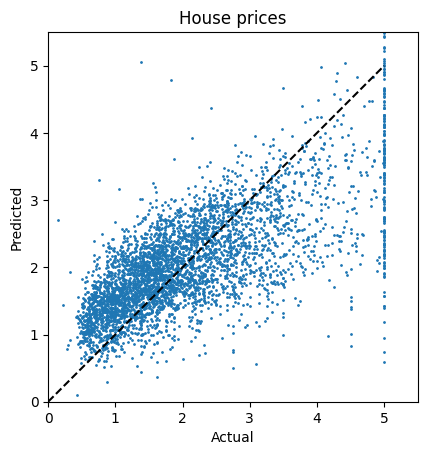

In [4]:
# Selecting some features that both make sense to use and have some correlation
selected_features = ['MedInc','HouseAge','AveRooms','Latitude']
X = df_housing[selected_features]
Y = df_housing['MEDV']

# Split dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

# Train a linear regression model for a quick test
model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Plot results
plt.title('House prices')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(Y_test, Y_pred, s = 1)
plt.plot([0,5],[0,5], color = 'black', linestyle = '--')
plt.xlim([0,5.5])
plt.ylim([0,5.5])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

Calculate a relevant evaluation metric for this model

In [5]:
# Evaluate model using a proper evaluation metric
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, Y_pred)
print(f'MSE is {mse}')

MSE is 0.6572879407900196


How does this compare to a model trained on all features?

(16512, 8)
(4128, 8)
MSE is 0.5289841670367201


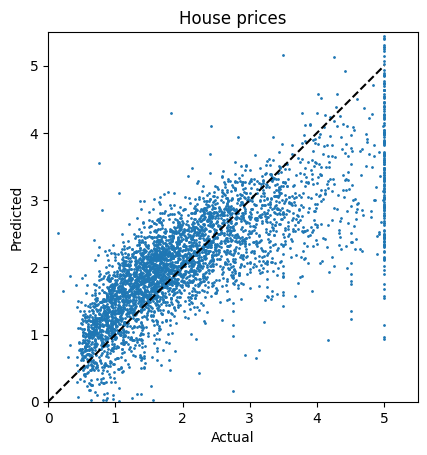

In [6]:
# Retrain a linear regression model on all features, calculate same evaluation metric and compare

# Selecting all features
selected_features = housing.feature_names
X = df_housing[selected_features]
Y = df_housing['MEDV']

# Split dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

# Train a linear regression model for a quick test
model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Plot results
plt.title('House prices')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(Y_test, Y_pred, s = 1)
plt.plot([0,5],[0,5], color = 'black', linestyle = '--')
plt.xlim([0,5.5])
plt.ylim([0,5.5])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

# Evaluate model using a proper evaluation metric
mse = mean_squared_error(Y_test, Y_pred)
print(f'MSE is {mse}')

**Q: How is the performance of the model trained with all features and with a subset of features? Explain why** <br>
In this case, the model trained with all features have a smaller MSE than that trained with a subset of the feature. 
The 3 features we selected at the beginning did not have strong correlation with the output to start with, so including all the other features with weak correlation increases model performance in this case.
In addition, the size of training sample is relative large compared to feature size, hence model is unlikely to overfit.

### 1.B) Wrapper Methods

#### Forward Selection

We can use either sklearn's or mlxtend's ```SequentialFeatureSelector()``` class.

In mlxtend: <br>
```SequentialFeatureSelector()``` class accepts the following major parameters:
* ```LinearRegression()``` acts as an estimator for the feature selection process. Alternatively, it can be substituted with other regression or classification based algorithm.
* ```k_features``` indicates the number of features to be selected. For demonstration purposes, 5 features are selected from the original 13. This value can be optimized by analyzing the scores for different numbers of features.
* ```forward``` indicates the direction of the wrapper method used. ```forward = True``` for forward selection whereas ```forward = False``` for backward elimination.
* ```scoring``` argument specifies the evaluation criterion to be used.
* ```cv``` argument is for k-fold cross-validation. Be default, it will be set as 5. Bear in mind, a larger number of cross-validation can be time-consuming and computing-intensive.

In [7]:
# Ensure we selected all features to start

X = df_housing[housing.feature_names]
Y = df_housing['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


In [8]:
# Use sklearn to do forward selection
from sklearn.feature_selection import SequentialFeatureSelector as SFS
sfs = SFS(LinearRegression(), n_features_to_select=5)
sfs.fit(X_train, Y_train)
sfs.get_feature_names_out()

array(['MedInc', 'HouseAge', 'AveBedrms', 'Latitude', 'Longitude'],
      dtype=object)

(16512, 5)
(4128, 5)
MSE is 0.5444594528087583


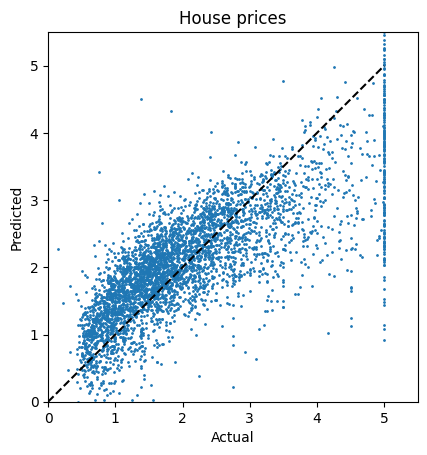

In [9]:
# Retrain a linear regression model on selected features, calculate same evaluation metric and compare

# Selecting features selected by Forward Selection method
selected_features = sfs.get_feature_names_out()
X = df_housing[selected_features]
Y = df_housing['MEDV']

# Split dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

# Train a linear regression model for a quick test
model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Plot results
plt.title('House prices')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(Y_test, Y_pred, s = 1)
plt.plot([0,5],[0,5], color = 'black', linestyle = '--')
plt.xlim([0,5.5])
plt.ylim([0,5.5])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

# Evaluate model using a proper evaluation metric
mse = mean_squared_error(Y_test, Y_pred)
print(f'MSE is {mse}')

Let's try using mlxtend library this time.

In [10]:
# Ensure we selected all features to start

X = df_housing[housing.feature_names]
Y = df_housing['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


In [11]:
# Using mlxtend
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

sfs = SFS(LinearRegression(), k_features=X_train.shape[1], forward=True, floating=False, scoring='neg_mean_squared_error', cv=5)
sfs.fit(X_train, Y_train)

df_SFS_results = pd.DataFrame(sfs.subsets_).transpose()

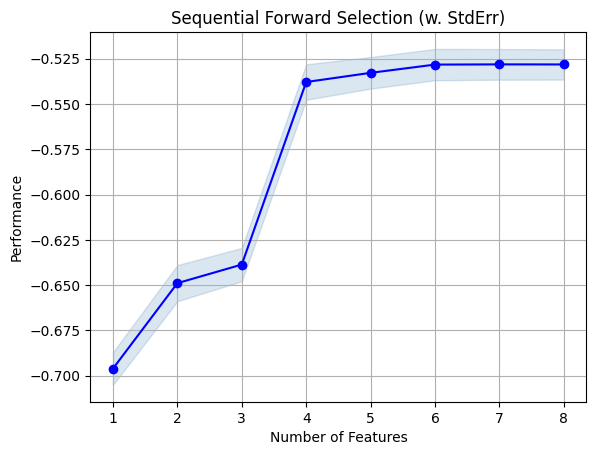

                feature_idx  \
1                      (0,)   
2                    (0, 1)   
3                 (0, 1, 6)   
4              (0, 1, 6, 7)   
5           (0, 1, 3, 6, 7)   
6        (0, 1, 2, 3, 6, 7)   
7     (0, 1, 2, 3, 5, 6, 7)   
8  (0, 1, 2, 3, 4, 5, 6, 7)   

                                           cv_scores avg_score  \
1  [-0.7071378932649991, -0.69361221621236, -0.72... -0.696133   
2  [-0.6595204708721956, -0.6472401842506778, -0.... -0.648952   
3  [-0.6493310802789256, -0.6388342015964926, -0.... -0.638689   
4  [-0.5481053041001804, -0.5344573208269069, -0.... -0.537879   
5  [-0.5371046999725609, -0.5301720198150593, -0.... -0.532808   
6  [-0.5392492626681993, -0.522983971310951, -0.5... -0.528259   
7  [-0.5376971334460885, -0.5264189622012136, -0.... -0.528136   
8  [-0.5377626243766596, -0.5262461020231357, -0.... -0.528176   

                                       feature_names  
1                                          (MedInc,)  
2              

In [12]:
# How do we select the optimal number for k_features?

fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

print(df_SFS_results)

# It turns out that the ideal number of features to minimize MSE is 7!

#### Recursive Feature Elimination (RFE)

In [13]:
# Ensure we selected all features to start

X = df_housing[housing.feature_names]
Y = df_housing['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


In [14]:
from sklearn.feature_selection import RFE

rfe = RFE(LinearRegression(), n_features_to_select=5, step=1)
rfe.fit(X_train, Y_train)
rfe.get_feature_names_out()

array(['MedInc', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude'],
      dtype=object)

(16512, 5)
(4128, 5)
MSE is 0.544925445663752


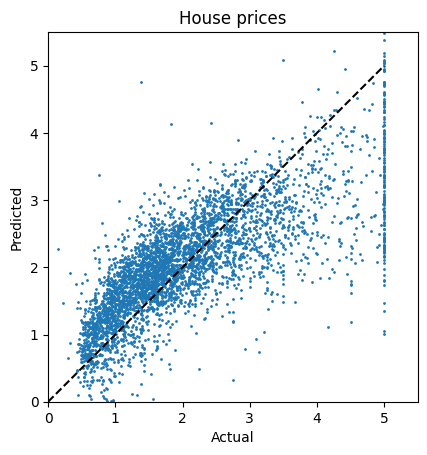

In [15]:
# Retrain a linear regression model on selected features, calculate same evaluation metric and compare

# Selecting features selected by Forward Selection method
selected_features = rfe.get_feature_names_out()
X = df_housing[selected_features]
Y = df_housing['MEDV']

# Split dataset into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

# Train a linear regression model for a quick test
model = LinearRegression().fit(X_train, Y_train)
Y_pred = model.predict(X_test)

# Plot results
plt.title('House prices')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(Y_test, Y_pred, s = 1)
plt.plot([0,5],[0,5], color = 'black', linestyle = '--')
plt.xlim([0,5.5])
plt.ylim([0,5.5])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

# Evaluate model using a proper evaluation metric
mse = mean_squared_error(Y_test, Y_pred)
print(f'MSE is {mse}')

### 1.C) Embedded Methods
Let's try some Embedded Methods for Feature Selection Methods

In [16]:
# Ensure we selected all features to start

X = df_housing[housing.feature_names]
Y = df_housing['MEDV']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(16512, 8)
(4128, 8)


#### L1 Regularization / Lasso Regression

MSE is 0.9375991453077105. Lasso score is 0.2943584770639537


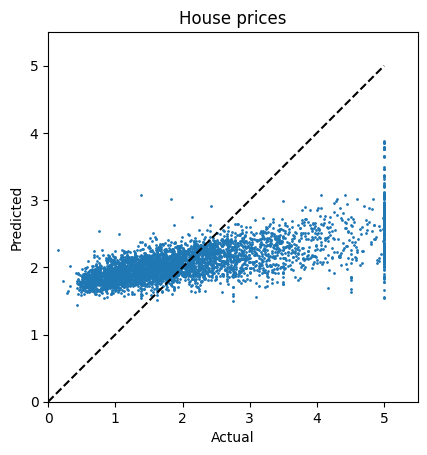

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, Y_train)
y_pred_lasso = lasso.predict(X_test)

# Plot results
plt.title('House prices')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(Y_test, y_pred_lasso, s = 1)
plt.plot([0,5],[0,5], color = 'black', linestyle = '--')
plt.xlim([0,5.5])
plt.ylim([0,5.5])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

mse = mean_squared_error(Y_test, y_pred_lasso)
lasso_score = lasso.score(X_train, Y_train)

print(f'MSE is {mse}. Lasso score is {lasso_score}')

#### L2 Regularization / Ridge Regression

MSE is 0.5290047234157984. Ridge score is 0.6088967772220122


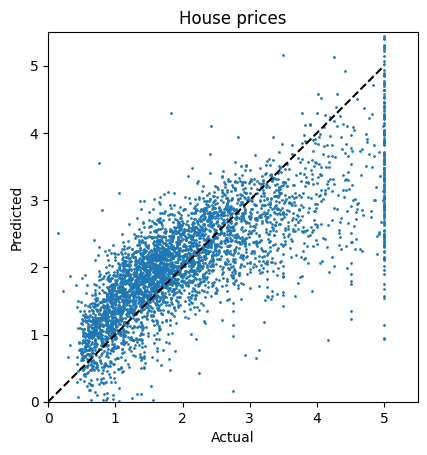

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, Y_train)
y_pred_ridge = ridge.predict(X_test)

# Plot results
plt.title('House prices')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.scatter(Y_test, y_pred_ridge, s = 1)
plt.plot([0,5],[0,5], color = 'black', linestyle = '--')
plt.xlim([0,5.5])
plt.ylim([0,5.5])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

mse = mean_squared_error(Y_test, y_pred_ridge)
ridge_score = ridge.score(X_train, Y_train)

print(f'MSE is {mse}. Ridge score is {ridge_score}')

**Q: Compare the performance of the models obtained using Lasso vs Ridge Regression. Explain your observation** <br>
With L1 regularization, the MSE of the model is 0.93, which is much higher than 0.529 of L2 regularization. In Lasso Regression, coefficients of the features are set to zero, whereas in Ridge Regression, coefficients are small but not zero. The Lasso Regresssion result mirrors the MSE behavior in Section 1.A) where the MSE of the model is higher when we handpicked only the top 3 features based on R. 

When the coefficients are set to zero (Lasso) or features are removed due to lower correlation (Pearson's R filter method), the model learn from lesser data. In this particular example, since the number of training samples are significantly larger than the feature space, cutting down on the feature space caused the model to not be able to fully learn from the data. This is called **underfitting**. In cases of underfitting, the model doesn't learn enough from the data, whereas in overfitting, the model learns too much from the training data it doesn't generalize to testing set. To solve underfitting, we should increase the training data space.

## 2) Classification

In [19]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
from scipy.stats import f_oneway

# Load dataset
wine = load_wine()

# Convert to DataFrames for easier manipulation
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['wine_class'] = wine.target

df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


### 2.A) Filter Methods
**Q: What statistics could you apply to the features for purposes of selection?** <br>
ANOVA or Kendall's correlation for numerical inputs and categorical outputs.

#### ANOVA

ANOVA is used to check the means of two or more groups that are significantly different from each other:

* $HO$: means of all groups are equal
* $H1$: at least one mean of the groups are different

ANOVA assumes: 1) linear relationship between the feature and the target, 2) the variables follow a Gaussian distribution.

One Way ANOVA tests the relationship between categorical predictor vs continuous response.

\begin{gather}
SS_{between} = \sum_{j=1}^p n_j (x_j - x)^2 \\
SS_{within} = \sum_{j=1}^p \sum_{i=1}^{n_j} (x_{ij} - x_j)^2 \\
\\
MS_{between} = \frac{SS_{between}}{k - 1}\\
MS_{within} = \frac{SS_{within}}{N - k}\\
\\
F = \frac{MS_{between}}{MS_{within}}
\end{gather}

where: <br>
$SS_{between} =$ sum of squares between the groups <br>
$SS_{within} =$ sum of squares within the groups <br>
$k =$ number of groups <br>
$N = $ total number of observations across all groups

<Axes: >

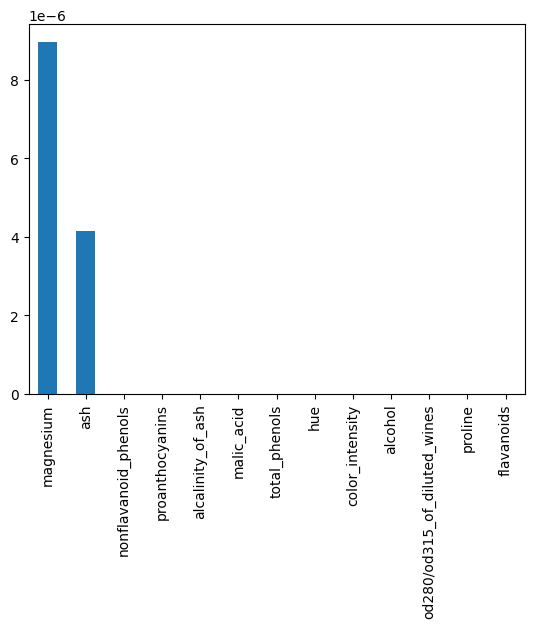

In [20]:
# Doing a one way ANOVA for each feature
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X_train = wine.data
Y_train = wine.target

univariate = f_classif(X_train, Y_train)
u = pd.Series(univariate[1])
u.index = wine.feature_names
u.sort_values(ascending=False).plot.bar()
# The smaller the p value, the more important the feature is

Feature 0 - alcohol: 135.07762424283948
Feature 1 - malic_acid: 36.94342496318376
Feature 2 - ash: 13.312901199989989
Feature 3 - alcalinity_of_ash: 35.77163740730817
Feature 4 - magnesium: 12.429584338150178
Feature 5 - total_phenols: 93.73300962036775
Feature 6 - flavanoids: 233.92587268154838
Feature 7 - nonflavanoid_phenols: 27.575417146965727
Feature 8 - proanthocyanins: 30.27138317022791
Feature 9 - color_intensity: 120.66401844100372
Feature 10 - hue: 101.31679539029965
Feature 11 - od280/od315_of_diluted_wines: 189.97232057888206
Feature 12 - proline: 207.92037390217828


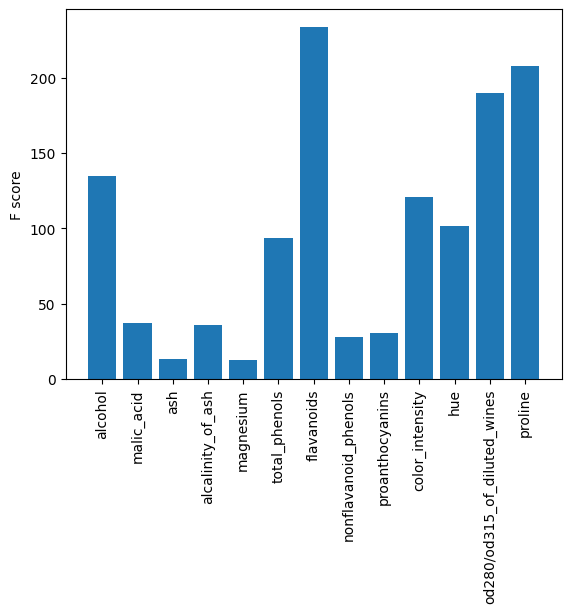

In [23]:
selected = SelectKBest(score_func=f_classif, k='all')
selected.fit(X_train, Y_train)
for i in range(len(selected.scores_)):
    print(f'Feature {i} - {wine.feature_names[i]}: {selected.scores_[i]}')

fig, ax = plt.subplots()
plt.bar([i for i in range(len(selected.scores_))], selected.scores_)
plt.ylabel('F score')
ax.set_xticks(np.arange(len(selected.scores_)))
ax.set_xticklabels(wine.feature_names, minor=False, rotation='vertical')
plt.show()

Real world data collection is expensive. Select the top 3 features to train on.

In [24]:
feature_ids = [6,11,12]
model = LogisticRegression(max_iter=10000).fit(wine.data[:,feature_ids], wine.target)
preds = model.predict(wine.data[:,feature_ids])
mat = confusion_matrix(wine.target, preds)
accuracy = np.trace(mat) / np.sum(mat)
print(mat)
print(accuracy)

[[56  3  0]
 [ 3 62  6]
 [ 0  0 48]]
0.9325842696629213


Accuracy leaves some to be desired. What if we search all possible combinations of 3 features to empirically discover the optimal 3?

In [25]:
from itertools import combinations

combos = list(combinations(range(len(wine.feature_names)), 3))

best = 0.0
best_feats = []
for combo in combos:
    feature_ids = combo
    model = LogisticRegression(max_iter=10000).fit(wine.data[:,feature_ids], wine.target)
    preds = model.predict(wine.data[:,feature_ids])
    mat = confusion_matrix(wine.target, preds)
    accuracy = np.trace(mat) / np.sum(mat)
    if accuracy > best:
        best_feats = combo
        best = accuracy
print(best_feats, best)

(6, 9, 12) 0.9606741573033708


If a one way ANOVA was used above to identify features, why did it not work so well?

**Answer**: rank-ordering by p-value probably is not the way to use it. The p-value just tells us the probability the null hypothesis is true, but does not tell us the effect size.

What are the pros and cons of searching for the best features by checking model results?

**Answer**:
- Pros - gaurantees the best performance on dataset, can help identify the necessary and sufficient features to get good performance

- Cons - often computationally prohibitive, often results in overfitting